EDA

Comenzaremos con analizar el dataset de Steam Games que hemos generado como csv en el ETL

In [3]:
#importamos las librerias con las que trabajeremos a lo largo del EDA
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt


## leemos el archivo output_steam_games.json
df_steam_games= pd.read_csv('steam_games.csv')


df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24064 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  object 
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(1), object(12)
memory usage: 11.9+ MB


C:\Users\CIN\AppData\Local\Temp\ipykernel_9180\2821507335.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_steam_games= pd.read_csv('steam_games.csv')


In [4]:
##verificamos cuantos registros nulos hay
num_nulos_por_columna = df_steam_games.isnull().sum()
print(num_nulos_por_columna)

publisher       96381
genres          91593
app_name        88312
title           90360
url             88310
release_date    90377
tags            88473
reviews_url     88312
specs           88980
price           89687
early_access    88310
id              88312
developer       91609
dtype: int64


In [5]:
# Calcula el número de filas con nulos en todas sus columnas
num_filas_con_nulos_en_todas_las_columnas = df_steam_games.isnull().all(axis=1).sum()

# Muestra el número de filas con nulos en todas sus columnas
print("Número de filas con nulos en todas sus columnas:", num_filas_con_nulos_en_todas_las_columnas)

Número de filas con nulos en todas sus columnas: 88310


In [6]:
#Elimina filas y columnas que contienen valores nulos y actualiza el DataFrame
df_steam_games_limpio = df_steam_games.dropna(axis=0, how='any').dropna(axis=1, how='any')

# Muestra información sobre el DataFrame después de eliminar filas y columnas nulas
print("Información del DataFrame después de eliminar filas y columnas nulas:")
print(df_steam_games_limpio.info())
df_steam_games_limpio.head()

Información del DataFrame después de eliminar filas y columnas nulas:
<class 'pandas.core.frame.DataFrame'>
Index: 22511 entries, 88310 to 120443
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     22511 non-null  object 
 1   genres        22511 non-null  object 
 2   app_name      22511 non-null  object 
 3   title         22511 non-null  object 
 4   url           22511 non-null  object 
 5   release_date  22511 non-null  object 
 6   tags          22511 non-null  object 
 7   reviews_url   22511 non-null  object 
 8   specs         22511 non-null  object 
 9   price         22511 non-null  object 
 10  early_access  22511 non-null  object 
 11  id            22511 non-null  float64
 12  developer     22511 non-null  object 
dtypes: float64(1), object(12)
memory usage: 2.4+ MB
None


conclusion Nulos:
Se encontraron 88310 filas vacias por lo que se eliminaron las mismas quedando un total de 22511 regitros en el dataset

In [8]:
# Reiniciamos los índices del DataFrame 
df_steam_games_limpio = df_steam_games_limpio.reset_index(drop=True)

df_steam_games_limpio.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域
4,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"['Action', 'Adventure', 'Simulation', 'FPS', '...",http://steamcommunity.com/app/772540/reviews/?...,"['Single-player', 'Steam Achievements']",3.99,False,772540.0,Trickjump Games Ltd


In [9]:
# Se eliminan las columnas 'url','publisher','tags','reviews_url','specs','early_access'

columnas_a_eliminar=['url','publisher','tags','reviews_url','specs','early_access']
steam_games_final=df_steam_games_limpio.drop(columns=columnas_a_eliminar)

In [10]:
steam_games_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22511 entries, 0 to 22510
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        22511 non-null  object 
 1   app_name      22511 non-null  object 
 2   title         22511 non-null  object 
 3   release_date  22511 non-null  object 
 4   price         22511 non-null  object 
 5   id            22511 non-null  float64
 6   developer     22511 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.2+ MB


In [11]:
#Se verifican duplicados y se los eliminan
duplicados=steam_games_final[steam_games_final.duplicated()]


In [12]:
print("Duplicados en todas las columnas:")
print(duplicados)

Duplicados en todas las columnas:
           genres                          app_name   
10093  ['Action']  Wolfenstein II: The New Colossus  \

                                  title release_date  price        id   
10093  Wolfenstein II: The New Colossus   2017-10-26  59.99  612880.0  \

           developer  
10093  Machine Games  


In [15]:
df_steam = steam_games_final.drop_duplicates()

Valores duplicados : se encontraron pocos valores duplicados por lo que se procedio a eliminarlos 

In [16]:
#Renombrar Columnas: decidí colocar todas los titulos de las columnas en español para que sea mas amigable al momento de usar la api

titulos_nuevos={'genres':'genero','title':'titulo','release_date':'anio_lanzamiento','price':'precio','id':'id_contenido','developer':'desarrollador'}
df_steam_nuevo=df_steam.rename(columns=titulos_nuevos)

df_steam_nuevo.head()

,genero,app_name,titulo,anio_lanzamiento,precio,id_contenido,desarrollador
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,2018-01-04,Free To Play,643980.0,Secret Level SRL
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,Free to Play,670290.0,Poolians.com
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,2017-12-07,0.99,767400.0,彼岸领域
4,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,Battle Royale Trainer,2018-01-04,3.99,772540.0,Trickjump Games Ltd


In [17]:
df_steam_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22510 entries, 0 to 22510
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genero            22510 non-null  object 
 1   app_name          22510 non-null  object 
 2   titulo            22510 non-null  object 
 3   anio_lanzamiento  22510 non-null  object 
 4   precio            22510 non-null  object 
 5   id_contenido      22510 non-null  float64
 6   desarrollador     22510 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.4+ MB


In [19]:
#modificamos  columna anio_lanzamiento para  dejar solo el añio
#Convertimos  la columna 'fecha' a formato datetime, intentando manejar diferentes formatos
df_steam_nuevo['anio_lanzamiento'] = pd.to_datetime(df_steam_nuevo['anio_lanzamiento'],errors='coerce')

# Extraemos el anio convirtiendo la serie resultante a formato de texto
df_steam_nuevo['anio_lanzamiento'] = df_steam_nuevo['anio_lanzamiento'].dt.strftime('%Y')

# Muestra el DataFrame después de modificar la columna 'fecha'
df_steam_nuevo.head()


,genero,app_name,titulo,anio_lanzamiento,precio,id_contenido,desarrollador
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,2018,Free To Play,643980.0,Secret Level SRL
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017,Free to Play,670290.0,Poolians.com
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,2017,0.99,767400.0,彼岸领域
4,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,Battle Royale Trainer,2018,3.99,772540.0,Trickjump Games Ltd


In [20]:
## se verificaron que en la columna precio había otros formatos como ejemplo  Free to Use, Free to Play] por 0.00

df_steam_nuevo['precio']=pd.to_numeric(df_steam_nuevo['precio'],errors='coerce')
# Reemplazar los valores no numéricos por 0.00
df_steam_nuevo['precio'].fillna(0.00, inplace=True)
print(df_steam_nuevo['precio'])


0        4.99
1        0.00
2        0.00
3        0.99
4        3.99
         ... 
22506    1.99
22507    1.99
22508    4.99
22509    1.99
22510    4.99
Name: precio, Length: 22510, dtype: float64


Conclusiones:
 se modificó a formato fecha  la columna release_date  para dejar solamente el año de lanzamiento y la columan precio se la paso a Float.Se verifica que en la columna precio había otros formatos como ejemplo  Free to Use, Free to Play los cuales se reemplazaron  por 0.00

In [25]:
df_steam_nuevo.describe()


,precio,id_contenido
count,22510.000000,2.251000e+04
mean,8.969343,4.306650e+05
std,15.420306,1.918836e+05
min,0.000000,1.000000e+01
25%,2.990000,3.022175e+05
50%,4.990000,4.269265e+05
75%,9.990000,5.806800e+05
max,995.000000,2.028850e+06


Visualizacion de outliers en la columna precios

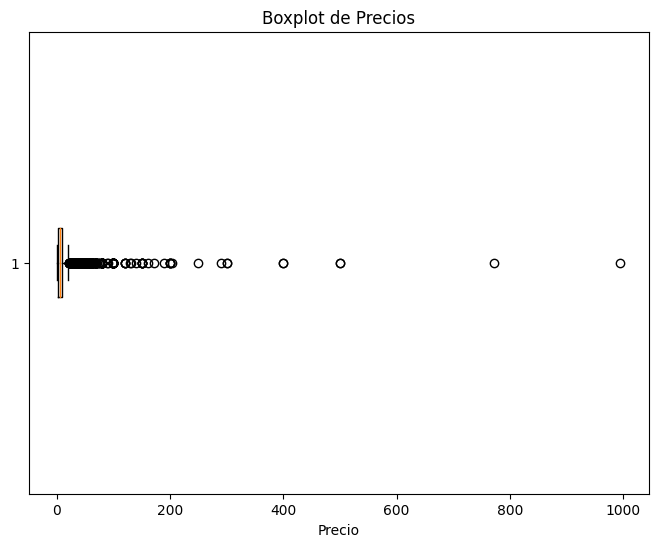

In [30]:
import matplotlib.pyplot as plt
# Boxplot de la columna de precio
plt.figure(figsize=(8, 6))
plt.boxplot(df_steam_nuevo['precio'], vert=False)
plt.xlabel('Precio')
plt.title('Boxplot de Precios')
plt.show()





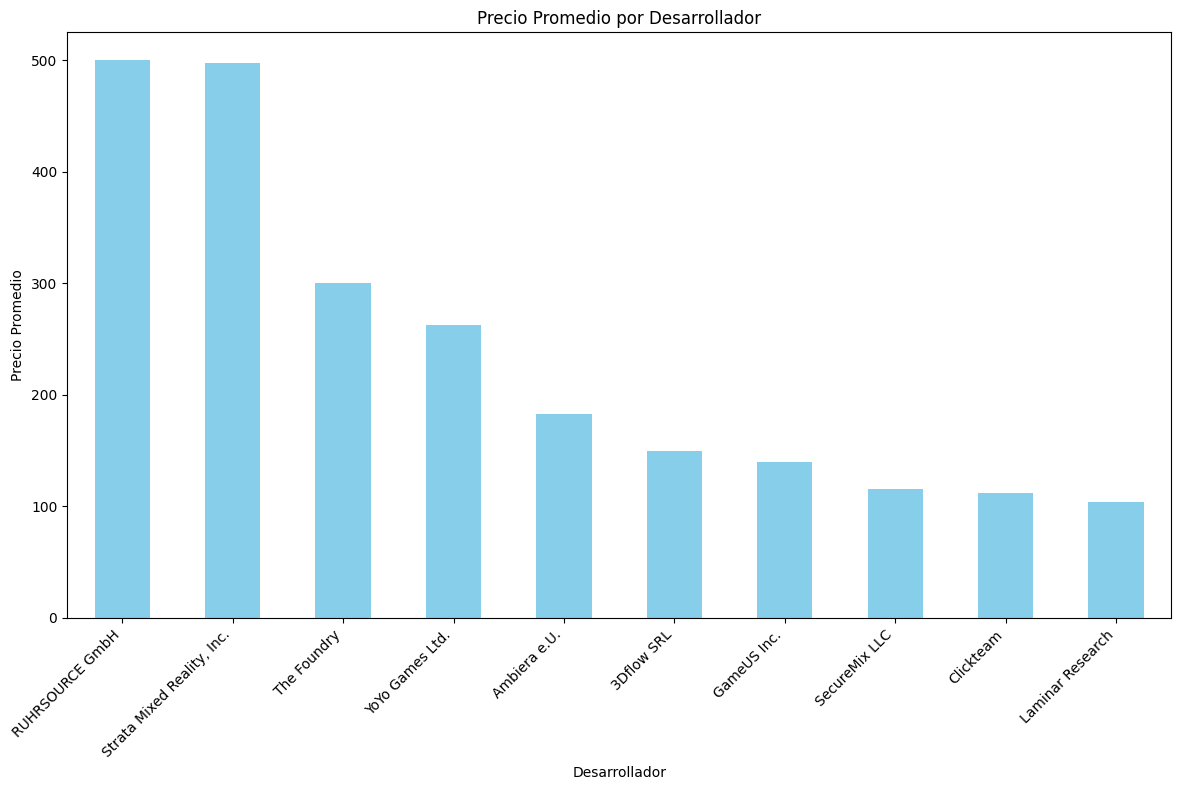

In [35]:


# Calculamos  el precio promedio por desarrollador
precio_promedio_por_desarrollador = df_steam_nuevo.groupby('desarrollador')['precio'].mean()

# Ordenamos los resultados de manera descendente por precio promedio
precio_promedio_por_desarrollador = precio_promedio_por_desarrollador.sort_values(ascending=False)


# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Graficamos el precio promedio por desarrollador (solo los 10 primeros para evitar demasiadas etiquetas)
precio_promedio_por_desarrollador[:10].plot(kind='bar', color='skyblue')

plt.xlabel('Desarrollador')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por Desarrollador')

plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()



In [37]:
# Suponiendo que tienes tu DataFrame df_steam_nuevo

# Encontrar el índice del juego más caro (fila con el precio máximo)
indice_juego_mas_caro = df_steam_nuevo['precio'].idxmax()

# Obtener el título del juego más caro
titulo_juego_mas_caro = df_steam_nuevo.loc[indice_juego_mas_caro, 'titulo']

print("El juego más caro es:", titulo_juego_mas_caro)

El juego más caro es: Strata Spaces VR – Professional Edition Upgrade


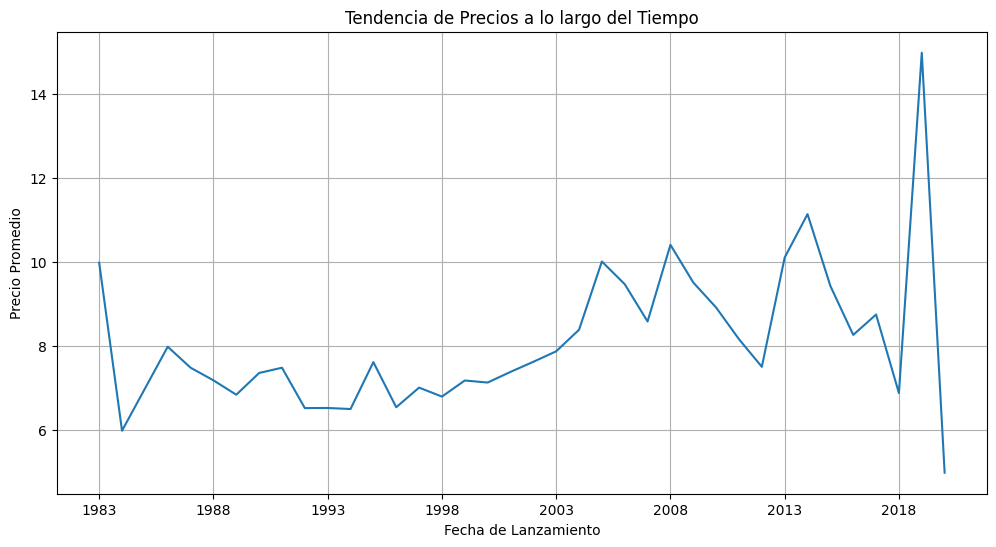

In [38]:

# Agrupar por fecha y calcular el precio promedio
precios_por_fecha = df_steam_nuevo.groupby('anio_lanzamiento')['precio'].mean()

# Graficar la tendencia de precios a lo largo del tiempo
plt.figure(figsize=(12, 6))
precios_por_fecha.plot()
plt.title('Tendencia de Precios a lo largo del Tiempo')
plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.show()


## Analisis de la Columna precio:
Se realiza una estadística descriptiva donde vemos  una media de $8,96 un precio min de 0.00 y un maximo de 995.000 con una desviasion estandar de 15.42
Se verifica valores atipicos que se encuentra en precios superiores a 500.
Se comparó el precio promedio por cada desarrollador y se verifica que los desarrollodares con precios mas caros son Ruhrsource y strata mixed reality
El juego más caro es: Strata Spaces VR – Professional Edition Upgrade
Tambien se realizo un analisis se series de tiempo con  la fecha de lanzamiento  para comprender cómo han variado los precios con el tiempo.


Nube de palabras para los Géneros :
Se verifican que los generos que resaltan mas son Adventure , Action , Casual e Indie

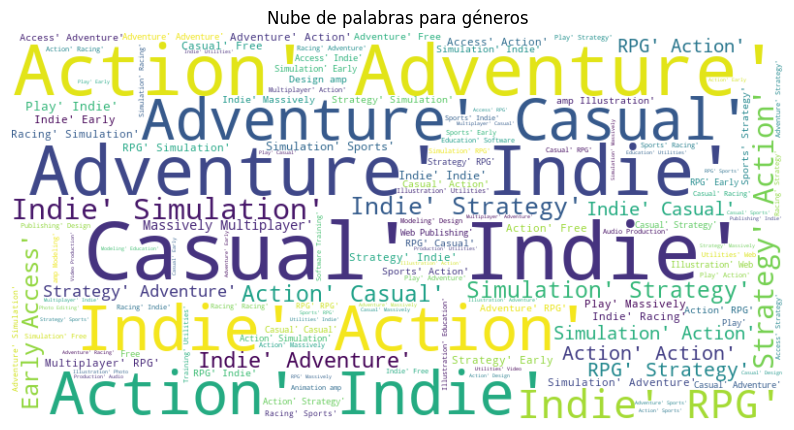

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar todos los géneros en una sola cadena
todos_generos = ' '.join(df_steam_nuevo['genero'])

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(todos_generos)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para géneros')
plt.show()


Cantidad de juegos por año :
en la grafica podemos observar que los años donde mas juegos hay son el 2009 al 2017


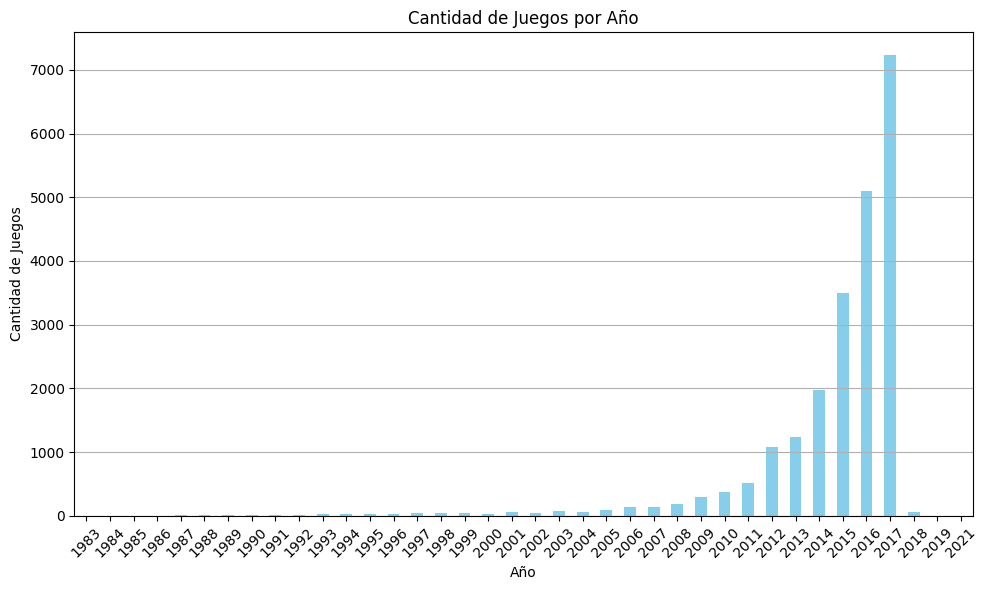

In [40]:

# Contamos  la cantidad de juegos por año
cantidad_juegos_por_año = df_steam_nuevo['anio_lanzamiento'].value_counts().sort_index()

# Graficar la cantidad de juegos por año
plt.figure(figsize=(10, 6))
cantidad_juegos_por_año.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Juegos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
df_steam_nuevo.to_csv('steam_games_api.csv', index=False)

Analisis del Dataset User Reviews:
importamos el archivo csv para comenzar con el EDA 

In [45]:
import pandas as pd 

## leemos el archivo user_items_reviewsparquet
df_user_reviews= pd.read_parquet('user_items_reviews.parquet')


df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      59305 non-null  object
 1   user_url     59305 non-null  object
 2   funny        59305 non-null  object
 3   posted       59305 non-null  object
 4   last_edited  59305 non-null  object
 5   item_id      59305 non-null  object
 6   helpful      59305 non-null  object
 7   recommend    59305 non-null  bool  
 8   review       59305 non-null  object
dtypes: bool(1), object(8)
memory usage: 3.7+ MB


In [46]:
#Verificacion de nulos 
num_nulos_por_columna =df_user_reviews .isnull().sum()
print(num_nulos_por_columna)

user_id        0
user_url       0
funny          0
posted         0
last_edited    0
item_id        0
helpful        0
recommend      0
review         0
dtype: int64


Conclusion: no se encontraron nulos en este dataset

In [47]:
df_user_reviews.head()

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...


In [48]:
#extraemos el  año de posteo 

df_user_reviews['posted'] =df_user_reviews['posted'].str.replace(r'.*?(\d{4}).*', r'\1', regex=True)

# Ahora, la columna 'posted' contiene solo el año

print(df_user_reviews['posted'])

0                   2011
1                   2011
2                   2011
3                   2014
4                   2013
              ...       
59300    Posted July 10.
59301     Posted July 8.
59302     Posted July 3.
59303    Posted July 20.
59304     Posted July 2.
Name: posted, Length: 59305, dtype: object


In [49]:
import re
# como se puede visualizar hay registros que no contienen el año de posteo por lo que no se  han transformado y reemplazarlos por el valor 0

# Definir una expresión regular para verificar si un valor es un año numérico
regex_pattern = r'^\d{4}$'

# Marcar los valores que no son años numéricos con 0
df_user_reviews['posted'] = df_user_reviews['posted'].apply(lambda x: 0 if not str(x).strip().replace('.', '').isdigit() and not bool(re.match(regex_pattern, str(x))) else x)

# Verificar el contenido actual de la columna 'posted'
print(df_user_reviews['posted'])

0        2011
1        2011
2        2011
3        2014
4        2013
         ... 
59300       0
59301       0
59302       0
59303       0
59304       0
Name: posted, Length: 59305, dtype: object


In [50]:
#eliminar filas con año 0 ya que no nos serviria para nuestra consulta posterior

# Eliminar filas donde el año es igual a 0
df_user_reviews= df_user_reviews[df_user_reviews['posted'] != 0]
print(df_user_reviews['posted'])

0        2011
1        2011
2        2011
3        2014
4        2013
         ... 
59252    2015
59255    2015
59265    2015
59267    2015
59276    2015
Name: posted, Length: 49186, dtype: object


Conclusion columna "posted": se realizó la extraccion del año de posteo , dejando solo el año y en las filas donde habia otro tipo de valores que no son fechas se reemplazo con 0 para su posterior eliminacion debido a que no sirven para las consultas posteriores que vamos a necesitar

In [51]:
# Contar cuántas filas tienen texto vacío en la columna 'Review'
filas_con_texto_vacio = df_user_reviews['review'].str.strip().eq('')
cantidad_filas_vacias = filas_con_texto_vacio.sum()

# Mostrar la cantidad de filas con texto vacío en la columna 'Review'
print("\nCantidad de filas con texto vacío en la columna 'review':", cantidad_filas_vacias)


Cantidad de filas con texto vacío en la columna 'review': 35


In [56]:
# Eliminar las filas que contienen texto vacío en la columna 'Review'
df_user_reviews_final= df_user_reviews[~filas_con_texto_vacio]

# Mostrar el DataFrame después de eliminar las filas con texto vacío en la columna 'Review'

print(df_user_reviews_final.head(2))

             user_id                                           user_url funny   
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...        \
1  76561197970982479  http://steamcommunity.com/profiles/76561197970...         

  posted last_edited item_id         helpful  recommend   
0   2011                1250  No ratings yet       True  \
1   2011               22200  No ratings yet       True   

                                              review  
0  Simple yet with great replayability. In my opi...  
1               It's unique and worth a playthrough.  


Conclusion columna Review , se encontraron 35 filas sin reviews de los juegos por lo tanto decidimos eliminarlas 

In [57]:
df_user_reviews_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49151 entries, 0 to 59276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      49151 non-null  object
 1   user_url     49151 non-null  object
 2   funny        49151 non-null  object
 3   posted       49151 non-null  object
 4   last_edited  49151 non-null  object
 5   item_id      49151 non-null  object
 6   helpful      49151 non-null  object
 7   recommend    49151 non-null  bool  
 8   review       49151 non-null  object
dtypes: bool(1), object(8)
memory usage: 3.4+ MB


In [58]:
#eliminamos columnas innecesarias 

df_user_reviews_final.drop(columns=['user_url', 'funny', 'last_edited', 'helpful'], axis=1,inplace=True)

C:\Users\CIN\AppData\Local\Temp\ipykernel_9180\2360318052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_reviews_final.drop(columns=['user_url', 'funny', 'last_edited', 'helpful'], axis=1,inplace=True)


In [59]:
df_user_reviews_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49151 entries, 0 to 59276
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    49151 non-null  object
 1   posted     49151 non-null  object
 2   item_id    49151 non-null  object
 3   recommend  49151 non-null  bool  
 4   review     49151 non-null  object
dtypes: bool(1), object(4)
memory usage: 1.9+ MB


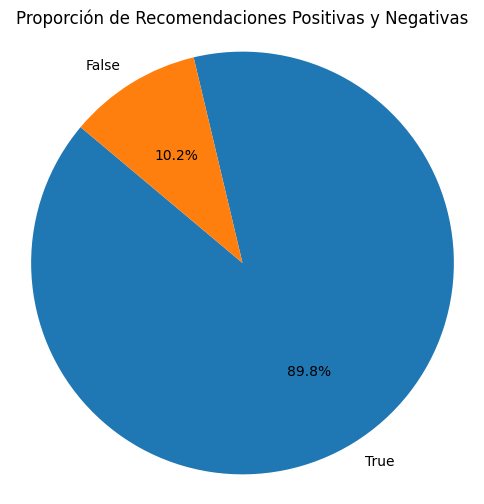

In [66]:

# 1. Calcular la proporción de recomendaciones positivas y negativas en tus datos
proporcion_recomendaciones = df_user_reviews_final['recommend'].value_counts(normalize=True)

# Graficar en un gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(proporcion_recomendaciones, labels=proporcion_recomendaciones.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Recomendaciones Positivas y Negativas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
